In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
del train['id']

In [3]:
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [5]:
train.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

There are 3 categorical variables.

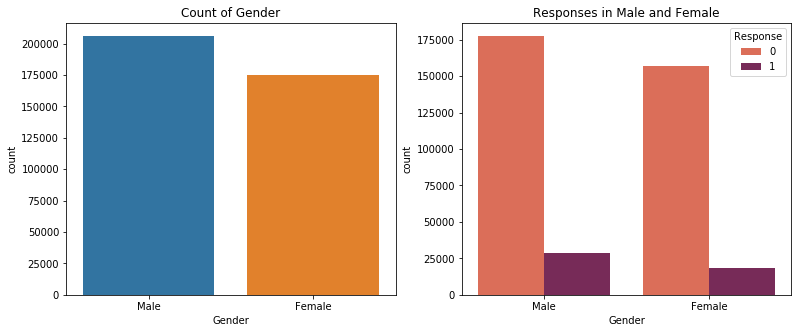

In [6]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Count of Gender")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'],palette="rocket_r")
plt.title("Responses in Male and Female")
plt.show()

The gender variable is equally distributed.

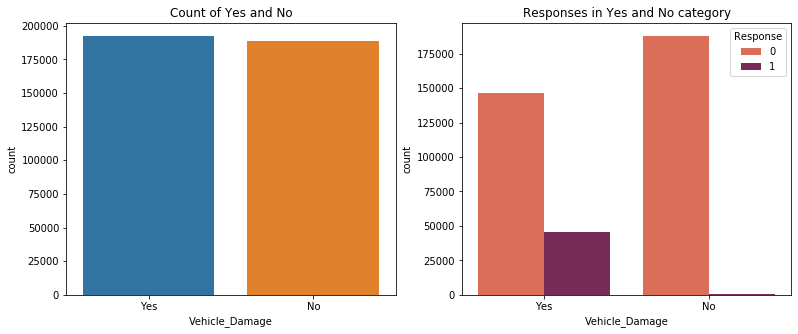

In [7]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])
plt.title("Count of Yes and No")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue = train['Response'],palette="rocket_r")
plt.title("Responses in Yes and No category")
plt.show()

This shows that people with no vehicle damage mostly don't opt for vehicle insurance. This suggests this could be an important feature. Also the chart on the left shows that this variable is equally represented in the dataset.

In [8]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

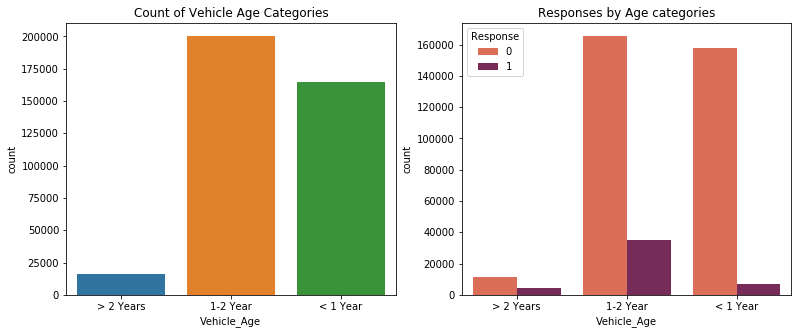

In [9]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count of Vehicle Age Categories")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Age categories")
plt.show()

Lets see if there is any missing value in the dataset

In [10]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

To check the quality of the dataset, lets see if any of the non-categorical columns have unreal values.

In [11]:
train.describe(percentiles=[0.25,0.5,0.75,0.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Driving License, Region_code, previously insured,policy sales channel are actually categorical variables

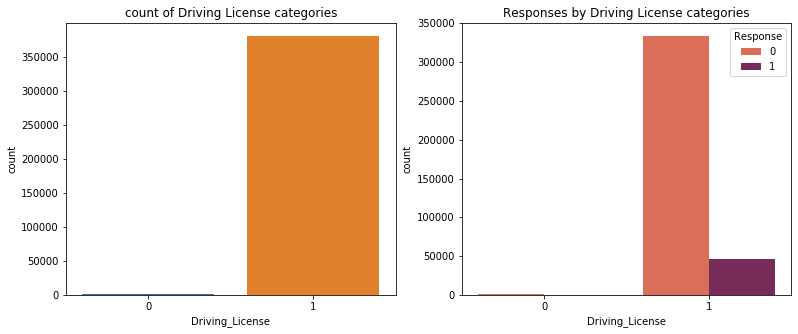

In [12]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])
plt.title("count of Driving License categories")
plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Driving License categories")
plt.show()

When plotting driving license by response, its clear that we don't have a lot of customers without a DL. This may or may not be a bad indicator

Text(0.5, 1.0, 'Region Representation in the data')

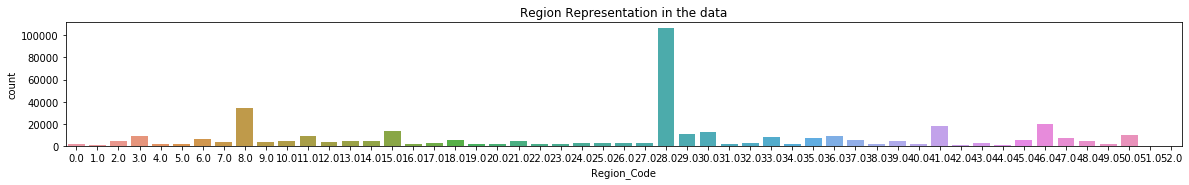

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(2,1,1)
sns.countplot(train['Region_Code'])
plt.title("Region Representation in the data")


We can see here that some regions are more dominantly represented in the training data.

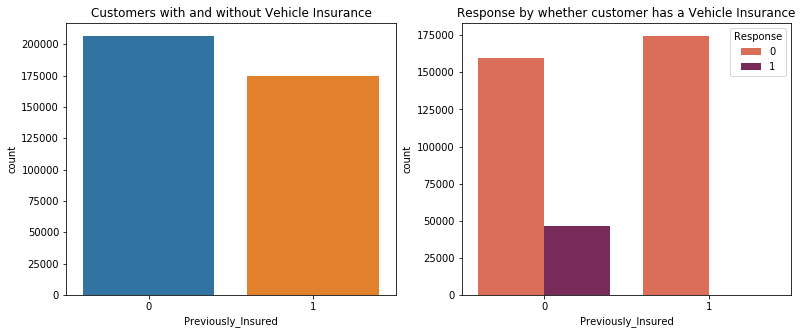

In [14]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])
plt.title("Customers with and without Vehicle Insurance")
plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue = train['Response'],palette="rocket_r")
plt.title("Response by whether customer has a Vehicle Insurance")
plt.show()

As expected, customers who already have vehicle insurance are not willing to buy another. This could be an important variable.

Age: max of 85 and min of 20 make sense. However, we should check if the age of people is random or is there a dominant age group

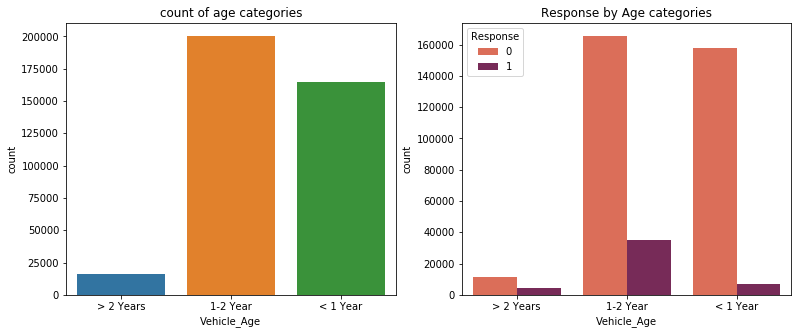

In [15]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("count of age categories")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette="rocket_r")
plt.title("Response by Age categories")
plt.show()

Text(0.5, 1.0, 'Age distribution for customers who responded yes')

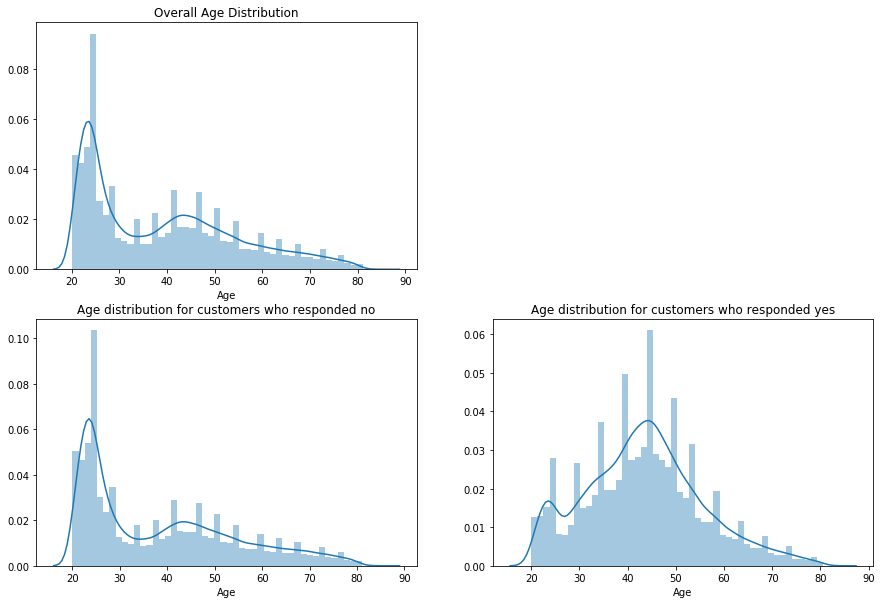

In [16]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Age'])
plt.title("Overall Age Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Age'])
plt.title("Age distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Age'])
plt.title("Age distribution for customers who responded yes")

We see there are more people in the age group of 20-30 than 40-50 in the overall training data.

Text(0.5, 1.0, 'Distribution for customers who responded yes')

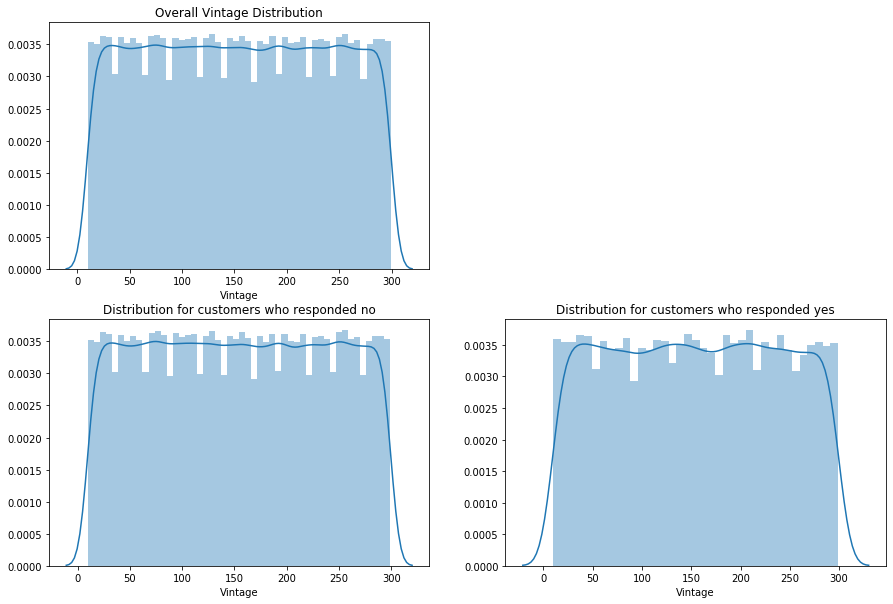

In [17]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Vintage'])
plt.title("Overall Vintage Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Vintage'])
plt.title("Distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Vintage'])
plt.title("Distribution for customers who responded yes")

Here, we see that the distribution for the variable Vintage does not change overall and for different response variables.

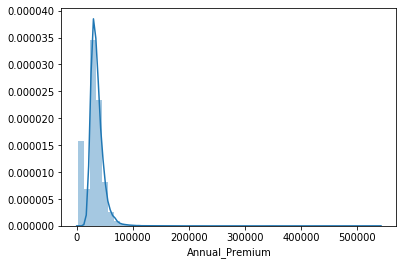

In [18]:
sns.distplot(train['Annual_Premium'])

The above graph and the describe suggests that there are outliers in this variable. To remove variables, we can use the 1.5iqr rule.

In [19]:
q3 =train['Annual_Premium'].quantile(0.75)
q1=train['Annual_Premium'].quantile(0.25)

In [20]:
iqr=q3-q1

upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [21]:
train_new=train[train['Annual_Premium']>=lower_boundary]
train_new=train_new[train_new['Annual_Premium']<=upper_boundary]

In [22]:
y=train_new['Response']
X=train_new.loc[:, train_new.columns != 'Response']

In [23]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

cat_cols=['Gender','Vehicle_Damage','Vehicle_Age']
for col in cat_cols:
    le = preprocessing.LabelEncoder()
    X[col]=le.fit_transform(X[col])


In [24]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [25]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [26]:
#Handling data imbalance using SMOTE:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_train, y_train)

In [27]:
#Catboost
#the best parameters were found by using cross validation
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier( iterations = 1000, 
                                random_seed = 42, 
#                                 task_type = 'GPU',
                                task_type = 'CPU',
                                learning_rate=0.15,
                                random_strength=0.1,
                                depth=8,
                                loss_function='Logloss',
                                eval_metric='Logloss',
                                leaf_estimation_method='Newton',
                                subsample = 0.9,
                                rsm = 0.8,
                                custom_loss = ['AUC'] )
cat_clf.fit(X_sm,y_sm)

0:	learn: 0.5449120	total: 122ms	remaining: 2m 2s
1:	learn: 0.4715159	total: 177ms	remaining: 1m 28s
2:	learn: 0.4376815	total: 229ms	remaining: 1m 16s
3:	learn: 0.4179434	total: 282ms	remaining: 1m 10s
4:	learn: 0.4019130	total: 342ms	remaining: 1m 8s
5:	learn: 0.3910568	total: 409ms	remaining: 1m 7s
6:	learn: 0.3787032	total: 463ms	remaining: 1m 5s
7:	learn: 0.3737941	total: 520ms	remaining: 1m 4s
8:	learn: 0.3680211	total: 584ms	remaining: 1m 4s
9:	learn: 0.3605125	total: 645ms	remaining: 1m 3s
10:	learn: 0.3558621	total: 702ms	remaining: 1m 3s
11:	learn: 0.3528498	total: 757ms	remaining: 1m 2s
12:	learn: 0.3494633	total: 822ms	remaining: 1m 2s
13:	learn: 0.3463530	total: 888ms	remaining: 1m 2s
14:	learn: 0.3436361	total: 947ms	remaining: 1m 2s
15:	learn: 0.3400903	total: 1s	remaining: 1m 1s
16:	learn: 0.3362194	total: 1.07s	remaining: 1m 2s
17:	learn: 0.3346704	total: 1.14s	remaining: 1m 2s
18:	learn: 0.3319411	total: 1.19s	remaining: 1m 1s
19:	learn: 0.3305808	total: 1.25s	remaini

161:	learn: 0.2243306	total: 11.1s	remaining: 57.3s
162:	learn: 0.2239038	total: 11.2s	remaining: 57.4s
163:	learn: 0.2238304	total: 11.3s	remaining: 57.4s
164:	learn: 0.2237692	total: 11.4s	remaining: 57.5s
165:	learn: 0.2237064	total: 11.5s	remaining: 57.6s
166:	learn: 0.2235104	total: 11.6s	remaining: 57.7s
167:	learn: 0.2231277	total: 11.7s	remaining: 57.8s
168:	learn: 0.2230104	total: 11.7s	remaining: 57.8s
169:	learn: 0.2228720	total: 11.8s	remaining: 57.7s
170:	learn: 0.2228150	total: 11.9s	remaining: 57.6s
171:	learn: 0.2221564	total: 12s	remaining: 57.5s
172:	learn: 0.2220697	total: 12s	remaining: 57.5s
173:	learn: 0.2219080	total: 12.1s	remaining: 57.6s
174:	learn: 0.2214671	total: 12.2s	remaining: 57.6s
175:	learn: 0.2209746	total: 12.3s	remaining: 57.7s
176:	learn: 0.2206178	total: 12.4s	remaining: 57.7s
177:	learn: 0.2204321	total: 12.5s	remaining: 57.7s
178:	learn: 0.2202910	total: 12.6s	remaining: 57.7s
179:	learn: 0.2201473	total: 12.7s	remaining: 57.8s
180:	learn: 0.22

320:	learn: 0.2087242	total: 22.2s	remaining: 46.9s
321:	learn: 0.2086962	total: 22.2s	remaining: 46.8s
322:	learn: 0.2086188	total: 22.3s	remaining: 46.7s
323:	learn: 0.2085351	total: 22.4s	remaining: 46.6s
324:	learn: 0.2084939	total: 22.4s	remaining: 46.6s
325:	learn: 0.2084345	total: 22.5s	remaining: 46.5s
326:	learn: 0.2083623	total: 22.6s	remaining: 46.5s
327:	learn: 0.2083151	total: 22.7s	remaining: 46.5s
328:	learn: 0.2082697	total: 22.7s	remaining: 46.4s
329:	learn: 0.2082272	total: 22.8s	remaining: 46.3s
330:	learn: 0.2081675	total: 22.9s	remaining: 46.3s
331:	learn: 0.2081177	total: 23s	remaining: 46.2s
332:	learn: 0.2080837	total: 23s	remaining: 46.1s
333:	learn: 0.2080438	total: 23.1s	remaining: 46.1s
334:	learn: 0.2079448	total: 23.2s	remaining: 46s
335:	learn: 0.2078816	total: 23.3s	remaining: 46s
336:	learn: 0.2078582	total: 23.4s	remaining: 46s
337:	learn: 0.2078191	total: 23.4s	remaining: 45.9s
338:	learn: 0.2077831	total: 23.5s	remaining: 45.9s
339:	learn: 0.2077456	

481:	learn: 0.2015850	total: 33.1s	remaining: 35.5s
482:	learn: 0.2015551	total: 33.1s	remaining: 35.5s
483:	learn: 0.2015231	total: 33.2s	remaining: 35.4s
484:	learn: 0.2014962	total: 33.3s	remaining: 35.3s
485:	learn: 0.2014588	total: 33.3s	remaining: 35.2s
486:	learn: 0.2014249	total: 33.4s	remaining: 35.2s
487:	learn: 0.2013831	total: 33.5s	remaining: 35.2s
488:	learn: 0.2013680	total: 33.6s	remaining: 35.1s
489:	learn: 0.2013463	total: 33.7s	remaining: 35s
490:	learn: 0.2013080	total: 33.7s	remaining: 35s
491:	learn: 0.2012548	total: 33.8s	remaining: 34.9s
492:	learn: 0.2012025	total: 33.9s	remaining: 34.9s
493:	learn: 0.2011565	total: 34s	remaining: 34.8s
494:	learn: 0.2011343	total: 34s	remaining: 34.7s
495:	learn: 0.2010956	total: 34.1s	remaining: 34.6s
496:	learn: 0.2010731	total: 34.1s	remaining: 34.6s
497:	learn: 0.2010521	total: 34.2s	remaining: 34.5s
498:	learn: 0.2010190	total: 34.3s	remaining: 34.4s
499:	learn: 0.2009820	total: 34.3s	remaining: 34.3s
500:	learn: 0.200957

641:	learn: 0.1961292	total: 43.4s	remaining: 24.2s
642:	learn: 0.1960871	total: 43.4s	remaining: 24.1s
643:	learn: 0.1960479	total: 43.5s	remaining: 24.1s
644:	learn: 0.1960324	total: 43.6s	remaining: 24s
645:	learn: 0.1960048	total: 43.7s	remaining: 23.9s
646:	learn: 0.1959866	total: 43.7s	remaining: 23.9s
647:	learn: 0.1959650	total: 43.8s	remaining: 23.8s
648:	learn: 0.1959489	total: 43.9s	remaining: 23.8s
649:	learn: 0.1959100	total: 44s	remaining: 23.7s
650:	learn: 0.1958881	total: 44s	remaining: 23.6s
651:	learn: 0.1958506	total: 44.1s	remaining: 23.5s
652:	learn: 0.1958198	total: 44.2s	remaining: 23.5s
653:	learn: 0.1957913	total: 44.2s	remaining: 23.4s
654:	learn: 0.1957646	total: 44.3s	remaining: 23.3s
655:	learn: 0.1957388	total: 44.4s	remaining: 23.3s
656:	learn: 0.1956948	total: 44.5s	remaining: 23.2s
657:	learn: 0.1956727	total: 44.5s	remaining: 23.2s
658:	learn: 0.1956427	total: 44.6s	remaining: 23.1s
659:	learn: 0.1956120	total: 44.7s	remaining: 23s
660:	learn: 0.195588

801:	learn: 0.1914952	total: 55.7s	remaining: 13.7s
802:	learn: 0.1914774	total: 55.8s	remaining: 13.7s
803:	learn: 0.1914543	total: 55.9s	remaining: 13.6s
804:	learn: 0.1914182	total: 56s	remaining: 13.6s
805:	learn: 0.1913868	total: 56.1s	remaining: 13.5s
806:	learn: 0.1913588	total: 56.2s	remaining: 13.4s
807:	learn: 0.1913469	total: 56.3s	remaining: 13.4s
808:	learn: 0.1913264	total: 56.3s	remaining: 13.3s
809:	learn: 0.1912957	total: 56.4s	remaining: 13.2s
810:	learn: 0.1912526	total: 56.5s	remaining: 13.2s
811:	learn: 0.1912117	total: 56.6s	remaining: 13.1s
812:	learn: 0.1911891	total: 56.7s	remaining: 13s
813:	learn: 0.1911432	total: 56.8s	remaining: 13s
814:	learn: 0.1911231	total: 56.9s	remaining: 12.9s
815:	learn: 0.1910764	total: 57s	remaining: 12.9s
816:	learn: 0.1910591	total: 57.2s	remaining: 12.8s
817:	learn: 0.1910142	total: 57.2s	remaining: 12.7s
818:	learn: 0.1909940	total: 57.3s	remaining: 12.7s
819:	learn: 0.1909599	total: 57.4s	remaining: 12.6s
820:	learn: 0.190935

962:	learn: 0.1872175	total: 1m 9s	remaining: 2.65s
963:	learn: 0.1871982	total: 1m 9s	remaining: 2.58s
964:	learn: 0.1871627	total: 1m 9s	remaining: 2.51s
965:	learn: 0.1871323	total: 1m 9s	remaining: 2.44s
966:	learn: 0.1871169	total: 1m 9s	remaining: 2.36s
967:	learn: 0.1870997	total: 1m 9s	remaining: 2.29s
968:	learn: 0.1870720	total: 1m 9s	remaining: 2.22s
969:	learn: 0.1870428	total: 1m 9s	remaining: 2.15s
970:	learn: 0.1870333	total: 1m 9s	remaining: 2.08s
971:	learn: 0.1869936	total: 1m 9s	remaining: 2s
972:	learn: 0.1869741	total: 1m 9s	remaining: 1.93s
973:	learn: 0.1869438	total: 1m 9s	remaining: 1.86s
974:	learn: 0.1869091	total: 1m 9s	remaining: 1.79s
975:	learn: 0.1868845	total: 1m 10s	remaining: 1.72s
976:	learn: 0.1868629	total: 1m 10s	remaining: 1.65s
977:	learn: 0.1868317	total: 1m 10s	remaining: 1.58s
978:	learn: 0.1868142	total: 1m 10s	remaining: 1.51s
979:	learn: 0.1867926	total: 1m 10s	remaining: 1.44s
980:	learn: 0.1867625	total: 1m 10s	remaining: 1.36s
981:	lear

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(criterion= 'entropy',
               max_depth= 6,
               min_samples_leaf= 6,
               min_samples_split= 7,
               n_estimators= 300,
                            class_weight='balanced')
clf.fit(X_sm,y_sm)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=6, min_samples_split=7,
                       n_estimators=300)

In [29]:
#LGBM


In [30]:
#evaluate model 
from sklearn.metrics import classification_report,auc,roc_curve
def plot_feature_imp():
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.plot(kind='barh')



def evaluate_model(model):
    
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred))
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    print ('Area under curve (AUC): ', auc(fpr,tpr))
    

In [31]:
#evaluate catboost
evaluate_model(cat_clf)
#precision and recall both are low. try catboost with 30000

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     81409
           1       0.35      0.34      0.34     11289

    accuracy                           0.84     92698
   macro avg       0.63      0.62      0.63     92698
weighted avg       0.84      0.84      0.84     92698

Area under curve (AUC):  0.8434099660668977


In [32]:
#evaluate rf
evaluate_model(clf)
#takeways:
#precision is low, recall is high

              precision    recall  f1-score   support

           0       0.97      0.70      0.82     81409
           1       0.29      0.86      0.43     11289

    accuracy                           0.72     92698
   macro avg       0.63      0.78      0.62     92698
weighted avg       0.89      0.72      0.77     92698

Area under curve (AUC):  0.8374011803609067


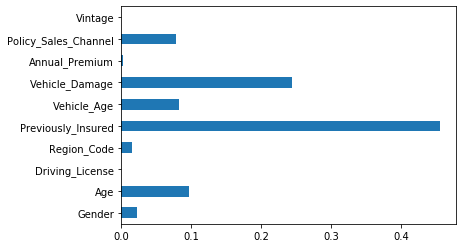

In [33]:
#feature imp - similar to data exp
plot_feature_imp()

In [44]:
from xgboost import XGBClassifier
XGB_model= XGBClassifier(random_state = 42, max_depth = 8, 
                            n_estimators = 10000, 
                            reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

xgb_clf=XGB_model.fit(X_train, y_train,verbose=2)

In [45]:
evaluate_model(xgb_clf)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     81409
           1       0.35      0.18      0.24     11289

    accuracy                           0.86     92698
   macro avg       0.62      0.57      0.58     92698
weighted avg       0.83      0.86      0.84     92698

Area under curve (AUC):  0.8312476952982977
